In [3]:
# Importing libary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [5]:
df = yf.download(['MSFT', 'KO', 'TSLA'], start='2017-01-01', auto_adjust=False)['Adj Close']
df

[*********************100%***********************]  3 of 3 completed


Ticker,KO,MSFT,TSLA
Date,,,
2017-01-03,32.210194,56.601131,14.466000
2017-01-04,32.094612,56.347881,15.132667
2017-01-05,32.171665,56.347881,15.116667
2017-01-06,32.163967,56.836288,15.267333
2017-01-09,31.840324,56.655396,15.418667
...,...,...,...
2025-03-28,70.370003,378.799988,263.549988
2025-03-31,71.620003,375.390015,259.160004
2025-04-01,71.870003,382.190002,268.459991


In [7]:
ret_df = df.pct_change()
ret_df.dropna(inplace=True)

Note: We are working on the assumption that our portfolio is divided into only 3 stocks

Defining a function to assign Weight vector

In [ ]:
def give_weights():
    rand = np.random.random(len(df.columns))
    rand /= rand.sum()
    return rand

## This function always calls the array of 3 in random
## Count of array is taken based on the columns of our Dataframe
give_weights()



array([0.36293195, 0.04939799, 0.58767006])

In [12]:
pf_exp, pf_stds, weights = [], [], []

for i in range(2000):
    W = give_weights()
    weights.append(W)
    pf_exp.append(W.dot(ret_df.mean()) *252)
    pf_stds.append(W.dot(ret_df.cov().dot(W)) *252)

# We are taking 252 since most stocks are atrded on 252 days in an year

In [13]:
len(pf_exp)

2000

Next we will take the lists from above variables and convert them into Dataframes for the lucidity of the content.

In [14]:
tog = pd.DataFrame({'pf_exp':pf_exp, 'pf_stds':pf_stds, 'weights':weights})

In [15]:
tog

,pf_exp,pf_stds,weights
0,0.230833,0.042202,"[0.4492399713679283, 0.4392034320342572, 0.111..."
1,0.455807,0.221031,"[0.05475045633223509, 0.23024395409865425, 0.7..."
2,0.311844,0.092283,"[0.50555647719202, 0.05697496453475021, 0.4374..."
3,0.430296,0.204248,"[0.21647079021889667, 0.07289651683613879, 0.7..."
4,0.399702,0.143028,"[0.013147281788143741, 0.4989849470573405, 0.4..."
...,...,...,...
1995,0.268871,0.055476,"[0.4100309187085225, 0.36133112085551494, 0.22..."
1996,0.343489,0.096777,"[0.15959531234341018, 0.4771026869597292, 0.36..."
1997,0.309696,0.076009,"[0.2889511176014158, 0.4000060420426375, 0.311..."
1998,0.302282,0.084595,"[0.5168712912040726, 0.0742961339632457, 0.408..."


<Axes: xlabel='pf_stds', ylabel='pf_exp'>

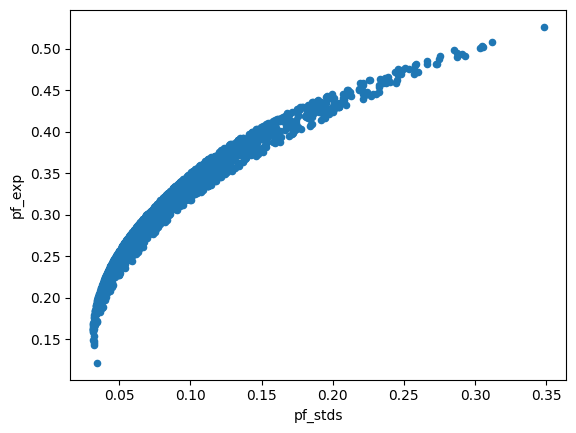

In [ ]:
tog.plot(x='pf_stds', y='pf_exp', kind='scatter', hue= ) 

In [17]:
# now let's find the maximum Sharpe ratio
sharpes = tog.pf_exp/tog.pf_stds

In [19]:
sharpes.nlargest(1).index

Index([380], dtype='int64')

In [20]:
tog.loc[sharpes.nlargest(1).index]

,pf_exp,pf_stds,weights
380,0.204766,0.035911,"[0.5942784311532463, 0.30969889869387934, 0.09..."


In [21]:
# Minimum variance of the portfolio

tog.nsmallest(1, 'pf_stds')

,pf_exp,pf_stds,weights
1059,0.149497,0.03132,"[0.8072152291019845, 0.18148345139298885, 0.01..."


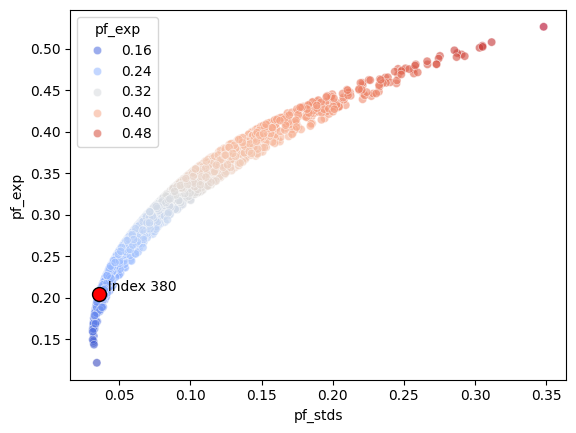

In [24]:
# Lets' plot the point
index = 380
import seaborn as sns

# Scatter plot with hue for all points
sns.scatterplot(data=tog, x='pf_stds', y='pf_exp', hue='pf_exp', palette='coolwarm', alpha=0.6)

# Highlighting the specific point
plt.scatter(tog.loc[index, 'pf_stds'], tog.loc[index, 'pf_exp'], color='red', s=100, edgecolors='black')

# Label
plt.text(tog.loc[index, 'pf_stds'], tog.loc[index, 'pf_exp'], '  Index 380', verticalalignment='bottom')

plt.show()
